# CH08 대표적인 연속형 확률분포
- 정규확률분포는 norm.함수명을 사용.​
  

- 정규확률밀도함수는 norm.pdf()함수를사용함.​

- 정규누적확률밀도함수는 norm.cdf()함수를 사용함.​

- 정규확률분포의 분위수는 norm.ppf()함수를 사용함.​

- 정규확률분포의 랜덤난수생성은 norm.rvs()함수를 사용함.

- 랜덤난수를 생성할 때, norm.rvs() 함수의 random_state 인자로 초기값을 고정할 수 있음.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar
import koreanize_matplotlib

%precision 3
%matplotlib inline

# 8.1 정규분포

In [23]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x) = pdf', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x) = cdf', ls='--', color='gray')

    ax.legend()
    plt.show()

In [5]:
def N(mu, sigma):
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

N(2, 0.5^2)을 따르는 확률변수 X를 작성

In [6]:
mu, sigma = 2, 0.5 # 기댓값은 2, 분산은 0.5**2
X = N(mu, sigma)

In [7]:
check_prob(X)

expected vaue 2.000
variance 0.250


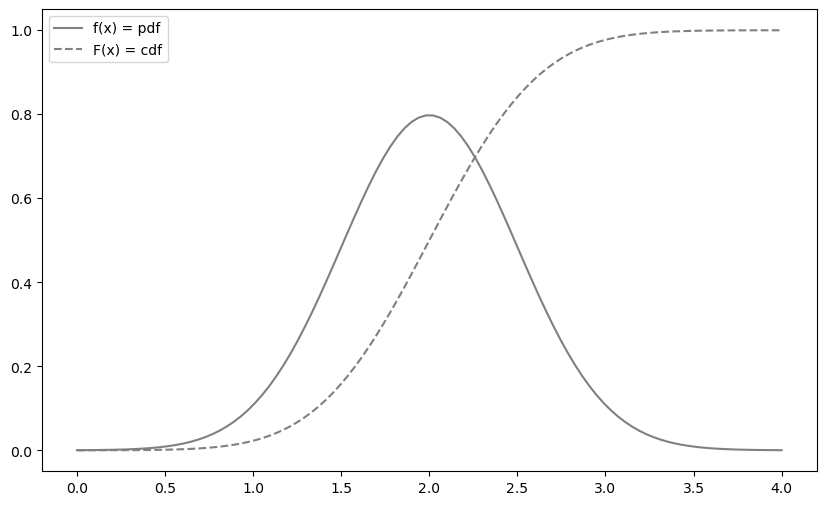

In [24]:
plot_prob(X, 0, 4)

기대값 -> mean  
분산 -> var

In [27]:
rv = stats.norm(2, 0.5) # 정규분포 객체 생성 

In [28]:
rv.mean(), rv.var()

(2.000, 0.250)

pdf(x) -> X 범위에 따른 정규 확률 __밀도함수__ 를 계산해줌

In [19]:
rv.pdf(2) 

0.798

(0.000, 1.050)

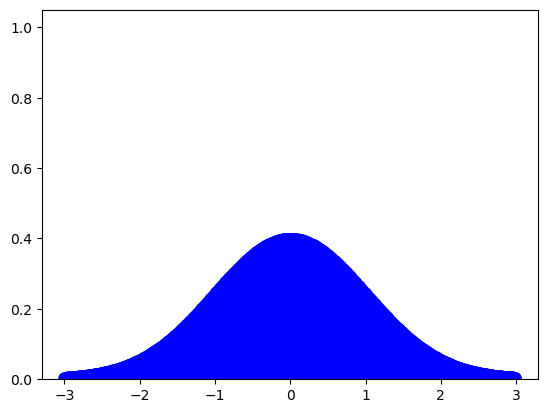

In [22]:
>>> #정규확률분포 그리기
>>> from scipy.stats import norm
>>> import matplotlib.pyplot as plt
>>> import numpy as np
>>> rv = norm(loc = 0, scale = 1) #평균 0이고 표준편차 1인 정규분포 객체 만들기
>>> x = np.arange(-3, 3, 0.01) #X 확률변수 범위
>>> y = rv.pdf(x) #X 범위에 따른 정규확률밀도값
>>> fig, ax = plt.subplots(1,1) 
>>> ax.plot(x, y,'bo', ms=8, label = 'normal pdf')
>>> ax.vlines(x, 0, y, colors='b', lw =5, alpha =0.5) #결과는
>>> ax.set_ylim([0,1.05]) #y축 범위

cdf(x) -> __분포함수__ $P(X<=x)$를 계산하는 함수  

In [25]:
rv.cdf(1.7) # X가 1.7보다 작은 값이 되는 확룰 P(X<=1.7)

0.955

(0.000, 1.050)

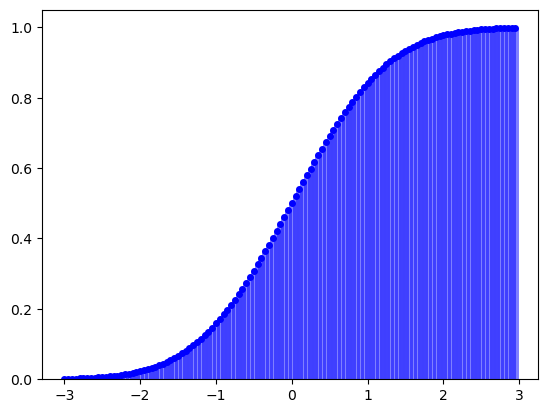

In [21]:
>>> #정규누적확률분포그리기
>>> from scipy.stats import norm
>>> import matplotlib.pyplot as plt
>>> import numpy as np
>>> rv = norm(loc = 0, scale = 1) #표준정규확률객체 만들기
>>> x = np.arange(-3, 3, 0.05) #X 확률변수 범위
>>> y = rv.cdf(x) #X 범위에 따른 누적확률밀도값
>>> fig, ax = plt.subplots(1,1) 
>>> ax.plot(x, y,'bo', ms=4, label = 'normal pmf')
>>> ax.vlines(x, 0, y, colors='b', lw =5, alpha =0.5) #결과는
>>> ax.set_ylim([0,1.05]) #y축 범위

isf -> 상위 100$\alpha$%점 : $P(X \leq x) = \alpha$(면적)를 만족하는 $x$  
표준정규분포는 $x=0$을 중심으로 대칭인 형태를 띠고 있어 $z_{1-\alpha} = -z_a$

In [36]:
# 상위 20% 구하기 오른쪽 부터 차오름 
rv.isf(0.2)

2.421

interval -> 확률이 $\alpha$가 되는 구간 구하기 : $P(a\leq X \leq b)=\alpha$  
return : (a, b)

In [38]:
rv.interval(0.6)
# 1번 요소는 rv.isf(0.2)와 같아짐 

(1.579, 2.421)

In [37]:
rv.isf(0.8), rv.isf(0.2)

(1.579, 2.421)

stats.norm을 통해 파라미터에 따라 정규분포의 형태가 어떻게 변화하는지 살펴보기  
$N(0, 1), N(0, 4), N(1, 1)$

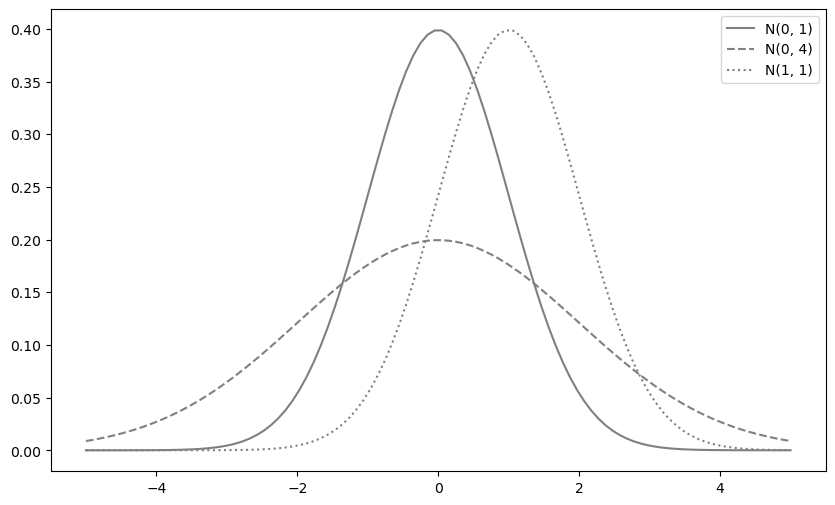

In [39]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()

$\sigma^2$이 커지면 -> 분포가 넓어짐  
$\mu$가 커지면 -> 평행이동

# 8.2 지수분포  
파라미터가 $\lambda$인 지수분포 = $Ex(\lambda)$  
-> 단위시간당 평균 $\lambda$번 발생하는 사건의 발생 간격을 따르는 확률분포  
+) $Poi(\lambda)$ : 단위시간당 평균 $\lambda$번 발생하는 사건에 대해서 단위시간당 사건이 발생하는 횟수  
즉, 지수분포는 포아송 분포와 관련성이 강한 확률분포임

In [40]:
def Ex(lam):
    x_range = [0, np.inf]
    def f(x):
        if x >= 0:
            return lam * np.exp(-lam * x)
        else:
            return 0
    return x_range, f

EX(3)을 따르는 확률변수 X

In [44]:
lam = 3
X = Ex(lam)
X

([0, inf], <function __main__.Ex.<locals>.f(x)>)

기댓값 ->  $1/3$  
분산 -> $1/9$

In [45]:
check_prob(X)

expected vaue 0.333
variance 0.111


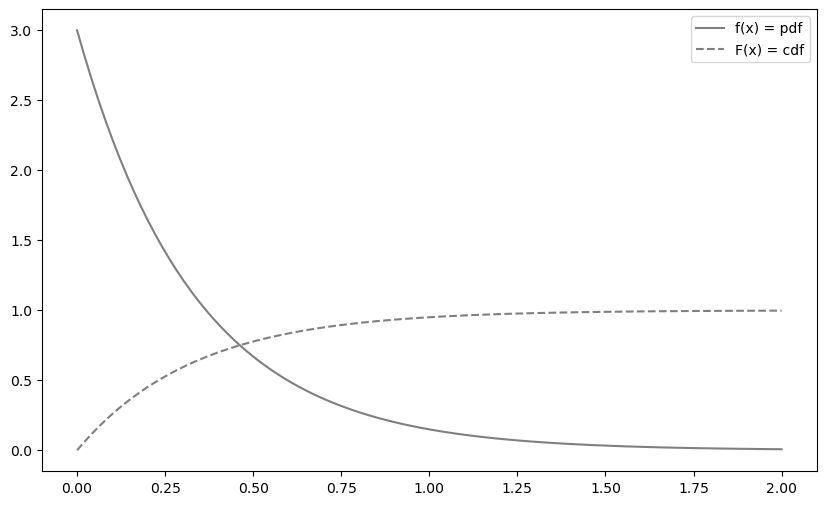

In [47]:
# 0부터 2 사이의 구간에서 밀도함수와 분포함수 
plot_prob(X, 0, 2)

기댓값 : $\frac{1}{\lambda}$  
분산: $\frac{1}{\lambda^2}$

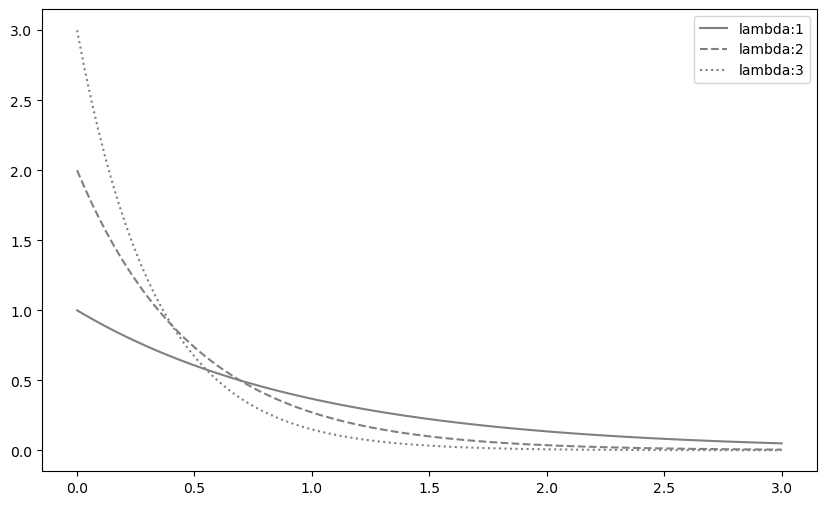

In [48]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
for lam, ls in zip([1, 2, 3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(xs, rv.pdf(xs),
            label=f'lambda:{lam}', ls=ls, color='gray')
ax.legend()

plt.show()

---
카이제곱분포, t분포, F분포sms CH10 이후에 설명할 __추정과 검정__ 에 사용하는 특수한 확률분포
- 어떤 사건이 따른다 X
- 어떤 형태를 하고 있다 O  

-> 정규분포와 어떠 관련성을 갖는지 중점으로 볼 것

# 8.3 카이제곱분포
- 분산의 구간추정 / 독립성 검정에서 사용
- 서로 __독립인 복수의__ 표준정규분포에 의해 다음과 같이 정의

$Z_1, Z_2, ...,Z_n$이 서로 독립이고 $N(0,1)$을 따르고 있을 때, 그 제곱합  
  
$Y=\sum_{i=1}^{n}Z_{i}^{2}$  
  
의 확률분포를 __자유도가 n인 카이제곱분포__ 라고 함 = $\chi^2(n)$

In [50]:
# 표준정규분포로 카이제곱 만들기
# 표본 크기 10(=n)으로 무작위 추출 -> 제곱합 100만 번 수행
n = 10 # 자유도
rv = stats.norm() # 아무것도 안쓰면 자동으로 0, 1
sample_size = int(1e6)
# 표준 정규 분포에서  표본 크기 100만으로 무작위 추출
Zs_sample = rv.rvs((n, sample_size))
# axis=0에서 총합을 구하고, 표준정규분포의 sum(z^2) 표본 데이터를 구한다
chi2_sample = np.sum(Zs_sample**2, axis=0) # = Y
# 히스토그램 생성 완료

chi2 -> 카이제곱분포  
히스토그램과 밀도함수가 정확하게 일치하고, $\sum_{i=1}^{10}Z_{i}^{2}$ = $\chi^2(10)$이 됨을 확인 가능

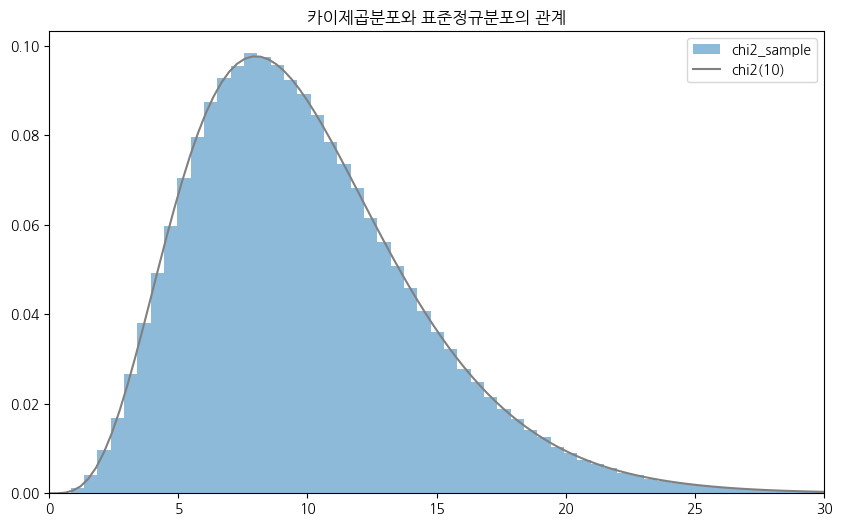

In [54]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n) # 카이제곱분포
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True,
        alpha=0.5, label='chi2_sample') # 히스토그램 
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray') # 밀도함수

ax.legend()
ax.set_xlim(0, 30)
plt.title("카이제곱분포와 표준정규분포의 관계")
plt.show()

카이제곱분포가 자유도 n에 따라 어떠한 분포 형태가 되는지 살펴보자  
자유도 n을 3, 5, 10으로!!

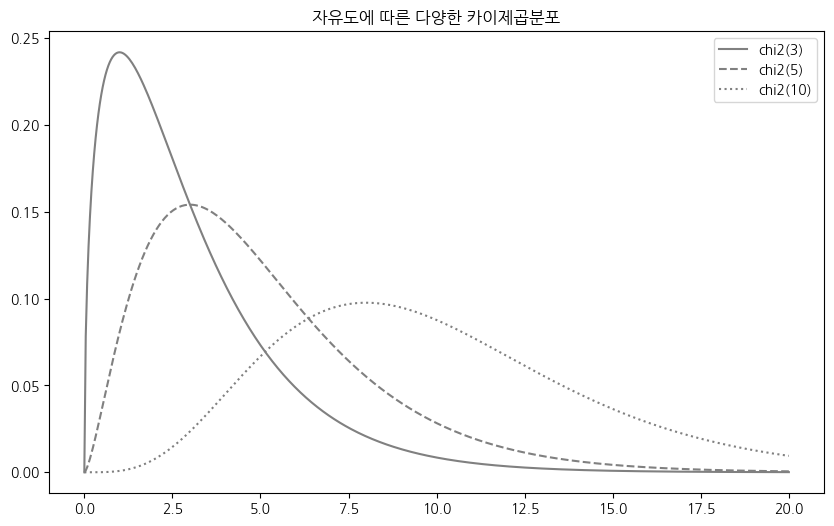

In [56]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label=f'chi2({n})', ls=ls, color='gray')
    
ax.legend()
plt.title("자유도에 따른 다양한 카이제곱분포")
plt.show()

>- 좌우비대칭으로, 왼쪽으로 치우치고 오른쪽으로 넓어짐  
>- 자유도가 커지면 좌우대칭에 가까워짐  
>- 자유도의 값 가까이에 분포의 정점이 있음

자유도 n인 카이제곱분포의 상위 $100\alpha$%점 = $\chi_\alpha^2(n)$

In [60]:
# alpha=0.05
# 자유도 = 5
rv = stats.chi2(5)
rv.isf(0.05)

11.070

**카이제곱분포 정리**
| | |
|------|---|
|**파라미터**|$n$|
|**취할 수 있는 값**|음수가 아닌 실수|
|**scipy.stats**|chi2(n)|

# 8.4 t분포
: 정규분포에서 **모평균의 구간추정** 등에 사용하는 확률분포
>확률변수 $Z, Y$는 서로 독립이고, $Z$는 표준정규분포 $N(0,1)$을 Y는 자유도가 n인 카이제곱분포 $\chi^2(n)$을 각각 다를 때,
>  
>$t = \frac{Z}{\sqrt{Y/n}}$
>  
>의 확률분포를 자유도가 n인 t분포라고 합니다. = $t(n)$

$N(0, 1)$과 $Y~\chi^2(n)$을 사용하여 $\frac{Z}{\sqrt{Y/10}}$에서 무작위 추출

In [63]:
n = 10 # 자유도
rv1 = stats.norm()
rv2 = stats.chi2(n) 

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample/n) #  히스토그램

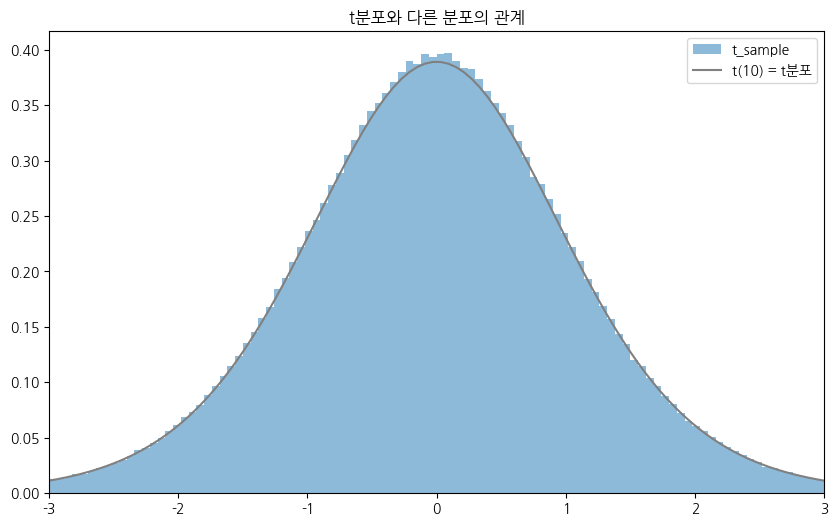

In [66]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.t(n) # 자유도가 10인 t분포 생성 
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins=100, range=(-3, 3),
        density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n}) = t분포', color='gray') # 히스토그램

ax.legend()
ax.set_xlim(-3, 3)
plt.title("t분포와 다른 분포의 관계")
plt.show()

자유도(3, 5, 10)에 따른 분포 형태 변화

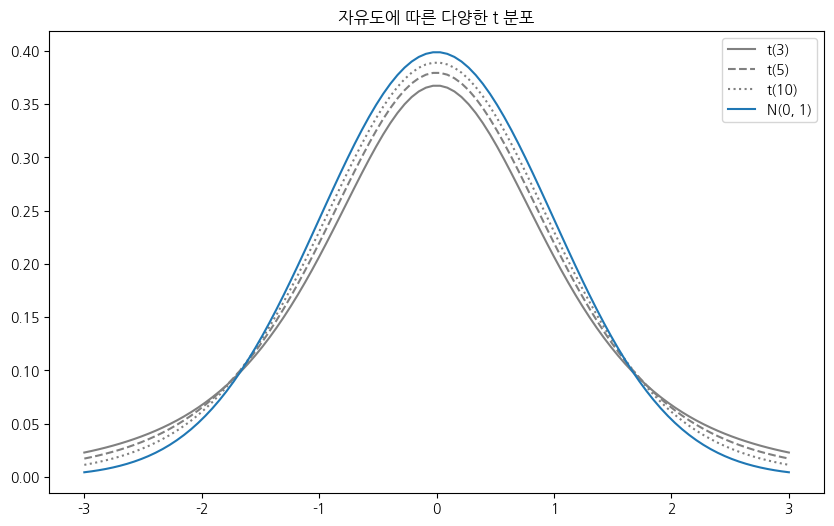

In [67]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs),
            label=f't({n})', ls=ls, color='gray')
rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0, 1)')
    
ax.legend()
plt.title("자유도에 따른 다양한 t 분포")
plt.show()

>- 좌우대칭인 분포
>- 표준정규분포보다 양쪽 끝이 두꺼움
>- 자유도가 커지면 표준정규분포에 가까워짐

In [68]:
rv = stats.t(5)
rv.isf(0.05)

2.015

**t분포 정리**
| | |
|------|---|
|**파라미터**|$n$|
|**취할 수 있는 값**|실수 전체|
|**scipy.stats**|t(n)|

# 8.5 F분포
: 분산분석 등에서 사용되는 확률붙포, 서로 독립인 두 개의 카이제곱분포에 의해 정의됨

>-좌우비대칭으로, 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포  
>분포의 정점은 __1__ 에 가까움  2(n)|

**F 정리**
| | |
|------|---|
|**파라미터**|$n_1, n_2$|
|**취할 수 있는 값**|음수가 아닌 실수|
|**scipy.stats**| t($n_1, n_2$)|